<a href="https://colab.research.google.com/github/billy90834/ML/blob/%E6%96%B0%E7%94%9F%E4%BD%9C%E6%A5%AD/ML/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')  #Read the train dataset
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')  #Read the test dataset
test.drop('id',axis=1,inplace=True)
#看dataset size
print(train.shape) 
print(test.shape)
print(train.columns.difference(test.columns))  #找train和test不同項

## 移除price_range欄位
X = train.drop('price_range', axis=1)
y = train['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #split into train and test set
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)





(2000, 21)
(1000, 20)
Index(['price_range'], dtype='object')
Shape of X =  (2000, 20)
Shape of y =  (2000,)


In [4]:
test.head()  #顯示前五筆資料

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [6]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#SVM CLASSIFICATION

In [15]:
#SVM CLASSIFICATION
svc = SVC(kernel = 'linear', random_state = 0, C = 100)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test) #predicting the values
print(classification_report(y_test, svc_pred)) # Accuracy Precision Recall F1-score Support
print()
print('confusion matrix')
cm_svc = confusion_matrix(y_test, svc_pred) #confusion matrix
print(cm_svc)
print()
print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, svc_pred))) #accuracy準確率

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       178
           1       0.95      0.97      0.96       150
           2       0.94      0.94      0.94       123
           3       0.99      0.96      0.98       149

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600


confusion matrix
[[176   2   0   0]
 [  3 146   1   0]
 [  0   6 116   1]
 [  0   0   6 143]]
Accuracy score of the Model: 
0.9683333333333334


#Random Forest Classifier

In [16]:
#Random Forest Classifier
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test) #predicting the values
print(classification_report(y_test, rfc_pred)) # Accuracy Precision Recall F1-score Support
print()
print('confusion matrix')
cm_rfc = confusion_matrix(y_test, svc_pred) #confusion matrix
print(cm_rfc)
print()
print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, rfc_pred)))   #accuracy

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       178
           1       0.82      0.79      0.81       150
           2       0.74      0.80      0.77       123
           3       0.93      0.91      0.92       149

    accuracy                           0.87       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.87      0.87      0.87       600


confusion matrix
[[176   2   0   0]
 [  3 146   1   0]
 [  0   6 116   1]
 [  0   0   6 143]]

Accuracy score of the Model: 
0.8666666666666667


# Decision Tree Classifier

In [17]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier()  
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)  #predicting the values
print(classification_report(y_test, dtc_pred))  # Accuracy Precision Recall F1-score Support
print()
print('confusion matrix')
cm_dtc = confusion_matrix(y_test, svc_pred)  #confusion matrix
print('Confusion Matrix',cm_dtc)
print()
print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, dtc_pred))) #accuracy

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       178
           1       0.76      0.71      0.74       150
           2       0.63      0.79      0.70       123
           3       0.90      0.84      0.87       149

    accuracy                           0.81       600
   macro avg       0.81      0.80      0.80       600
weighted avg       0.82      0.81      0.81       600


confusion matrix
Confusion Matrix [[176   2   0   0]
 [  3 146   1   0]
 [  0   6 116   1]
 [  0   0   6 143]]

Accuracy score of the Model: 
0.8083333333333333


#KNNeighbours Classifier


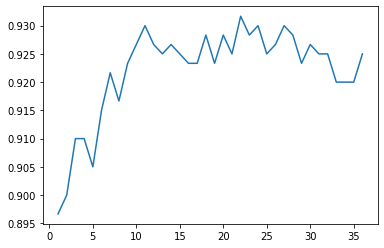

best k: 21
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       178
           1       0.93      0.92      0.93       150
           2       0.84      0.91      0.87       123
           3       0.96      0.89      0.93       149

    accuracy                           0.93       600
   macro avg       0.92      0.93      0.92       600
weighted avg       0.93      0.93      0.93       600


confusion matrix
[[174   4   0   0]
 [  7 138   5   0]
 [  0   6 112   5]
 [  0   0  16 133]]

Accuracy score of the Model: 
0.9283333333333333


In [24]:
import math
accuracy = []
# find the best K
for k in range(1, round(math.sqrt(len(X_train)))):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred)) 

# 各k值的accuracy圖
k_range = range(1,round(math.sqrt(len(X_train))))
plt.plot(k_range, accuracy)
plt.show()

best_k = np.argmax(accuracy)
print('best k: ' + str(best_k)) #Best K
knn = KNeighborsClassifier(n_neighbors=best_k-1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)  #predicting the values
print(classification_report(y_test, knn_pred))# Accuracy Precision Recall F1-score Support
print()
print('confusion matrix')
cm_KNN = confusion_matrix(y_test, knn_pred)   #confusion matrix
print(cm_KNN)
print()
print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, knn_pred)))   #accuracy



In [26]:
# confusion_matrix
print()
print('test data confusion matrix:')
print(confusion_matrix(knn_pred,y_test))

# Accuracy Precision Recall F1-score Support
print()
print('test data Performance metrics:')
print(classification_report(knn_pred,y_test))

# predict with X_train
pred2 = knn.predict(X_train)

# confusion_matrix
print()
print('train data confusion matrix:')
print(confusion_matrix(pred2,y_train))

# Accuracy Precision Recall F1-score Support
print()
print('train data Performance metrics:')
print(classification_report(pred2,y_train))


test data confusion matrix:
[[174   7   0   0]
 [  4 138   6   0]
 [  0   5 112  16]
 [  0   0   5 133]]

test data Performance metrics:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       181
           1       0.92      0.93      0.93       148
           2       0.91      0.84      0.87       133
           3       0.89      0.96      0.93       138

    accuracy                           0.93       600
   macro avg       0.93      0.92      0.92       600
weighted avg       0.93      0.93      0.93       600


train data confusion matrix:
[[315  12   0   0]
 [  7 325  16   0]
 [  0  13 356  22]
 [  0   0   5 329]]

train data Performance metrics:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       327
           1       0.93      0.93      0.93       348
           2       0.94      0.91      0.93       391
           3       0.94      0.99      0.96       334

    accuracy   